In [5]:
import pandas as pd

# Option 1: double backslashes
file_path = "C:\\Users\\Dell\\OneDrive\\Desktop\\financial_data.csv"

# Read CSV with semicolon separator
df = pd.read_csv(file_path, sep=";", engine="python")

# Clean column names (optional but good for SQL use)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

print(df.head(10))
print(df.columns)


   transaction_id  order_date product_category                 product_name  \
0           10001  2024-01-01      Electronics                iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances             Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing             Levi's 501 Jeans   
3           10004  2024-01-04            Books            The Da Vinci Code   
4           10005  2024-01-05  Beauty Products      Neutrogena Skincare Set   
5           10006  2024-01-06           Sports  Wilson Evolution Basketball   
6           10007  2024-01-07      Electronics          MacBook Pro 16-inch   
7           10008  2024-01-08  Home Appliances         Blueair Classic 480i   
8           10009  2024-01-09         Clothing             Nike Air Force 1   
9           10010  2024-01-10            Books        Dune by Frank Herbert   

   units_sold  unit_price  total_revenue         region payment_method  
0           2      999.99        1999.98  North America  

In [9]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df

,transaction_id,order_date,product_category,product_name,units_sold,unit_price,total_revenue,region,payment_method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal
...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal


In [11]:
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month
df

,transaction_id,order_date,product_category,product_name,units_sold,unit_price,total_revenue,region,payment_method,year,month
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024,1
...,...,...,...,...,...,...,...,...,...,...,...
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal,2024,8
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card,2024,8
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card,2024,8
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal,2024,8


In [21]:
#Perform aggregation (monthly revenue & order volume)
print(df.columns.tolist())



df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

result = (
    df.groupby(['year','month'])
      .agg(total_revenue=('unit_price','sum'),      # <-- use your actual column name
           order_volume=('transaction_id','nunique')) # <-- use your actual column name
      .reset_index()
      .sort_values(['year','month'])
)

print(result)




['transaction_id', 'order_date', 'product_category', 'product_name', 'units_sold', 'unit_price', 'total_revenue', 'region', 'payment_method', 'year', 'month']
   year  month  total_revenue  order_volume
0  2024      1        8943.69            31
1  2024      2        6160.29            29
2  2024      3        8087.74            31
3  2024      4        9076.16            30
4  2024      5        6571.95            31
5  2024      6        6412.12            30
6  2024      7        5500.54            31
7  2024      8        5982.45            27


In [23]:
result.to_csv("sales_trend_results.csv", index=False)


In [25]:
result

,year,month,total_revenue,order_volume
0,2024,1,8943.69,31
1,2024,2,6160.29,29
2,2024,3,8087.74,31
3,2024,4,9076.16,30
4,2024,5,6571.95,31
5,2024,6,6412.12,30
6,2024,7,5500.54,31
7,2024,8,5982.45,27


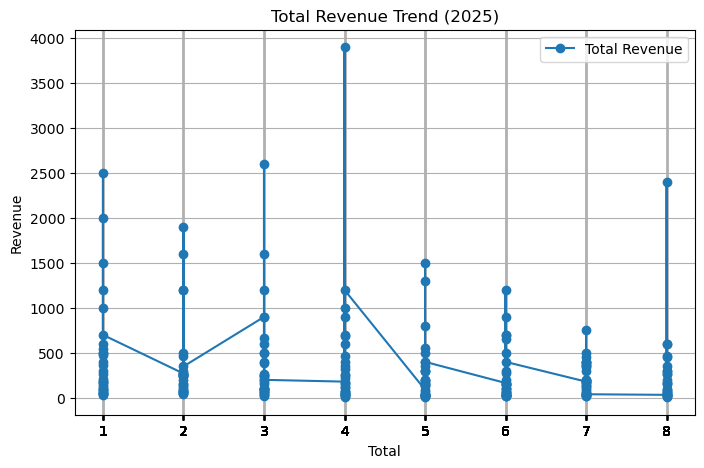

In [33]:

# Plot Monthly Revenue Trend
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.plot(df["month"], df["total_revenue"], marker="o", label="Total Revenue")
plt.title("Total Revenue Trend (2025)")
plt.xlabel("Total")
plt.ylabel("Revenue")
plt.xticks(df["month"])
plt.legend()
plt.grid(True)
plt.show()

In [35]:
df.to_csv("sales_trend_results1.csv", index=False)

print("CSV file 'monthly_sales.csv' has been created successfully!")

✅ CSV file 'monthly_sales.csv' has been created successfully!
